# LOGBOOK: Impact Source Localization On Planar and Curved Robotic Surfaces Agnostic of the Sensor Positions

## Author: Sarah Aguasvivas Manzano
### September 2018

The goal of this project is continue to develop an algorithm to localize the source of an impact based on embedded piezoelectric sensors. We intend to provide a general method that can be applied to any kind of surface and any kind of material.

### STEP 1:

The first step that I tried is to characterize the signal depending on the response of two piezoelectric sensors 


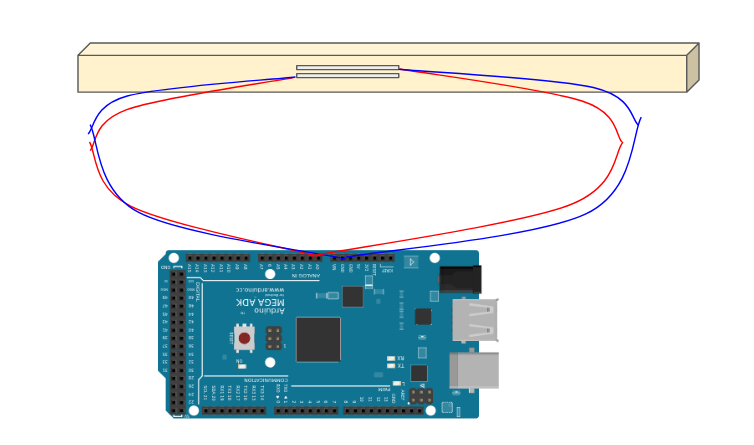

In [10]:
from IPython.display import Image
Image(filename='img/FirstSetup.png', width= 500)

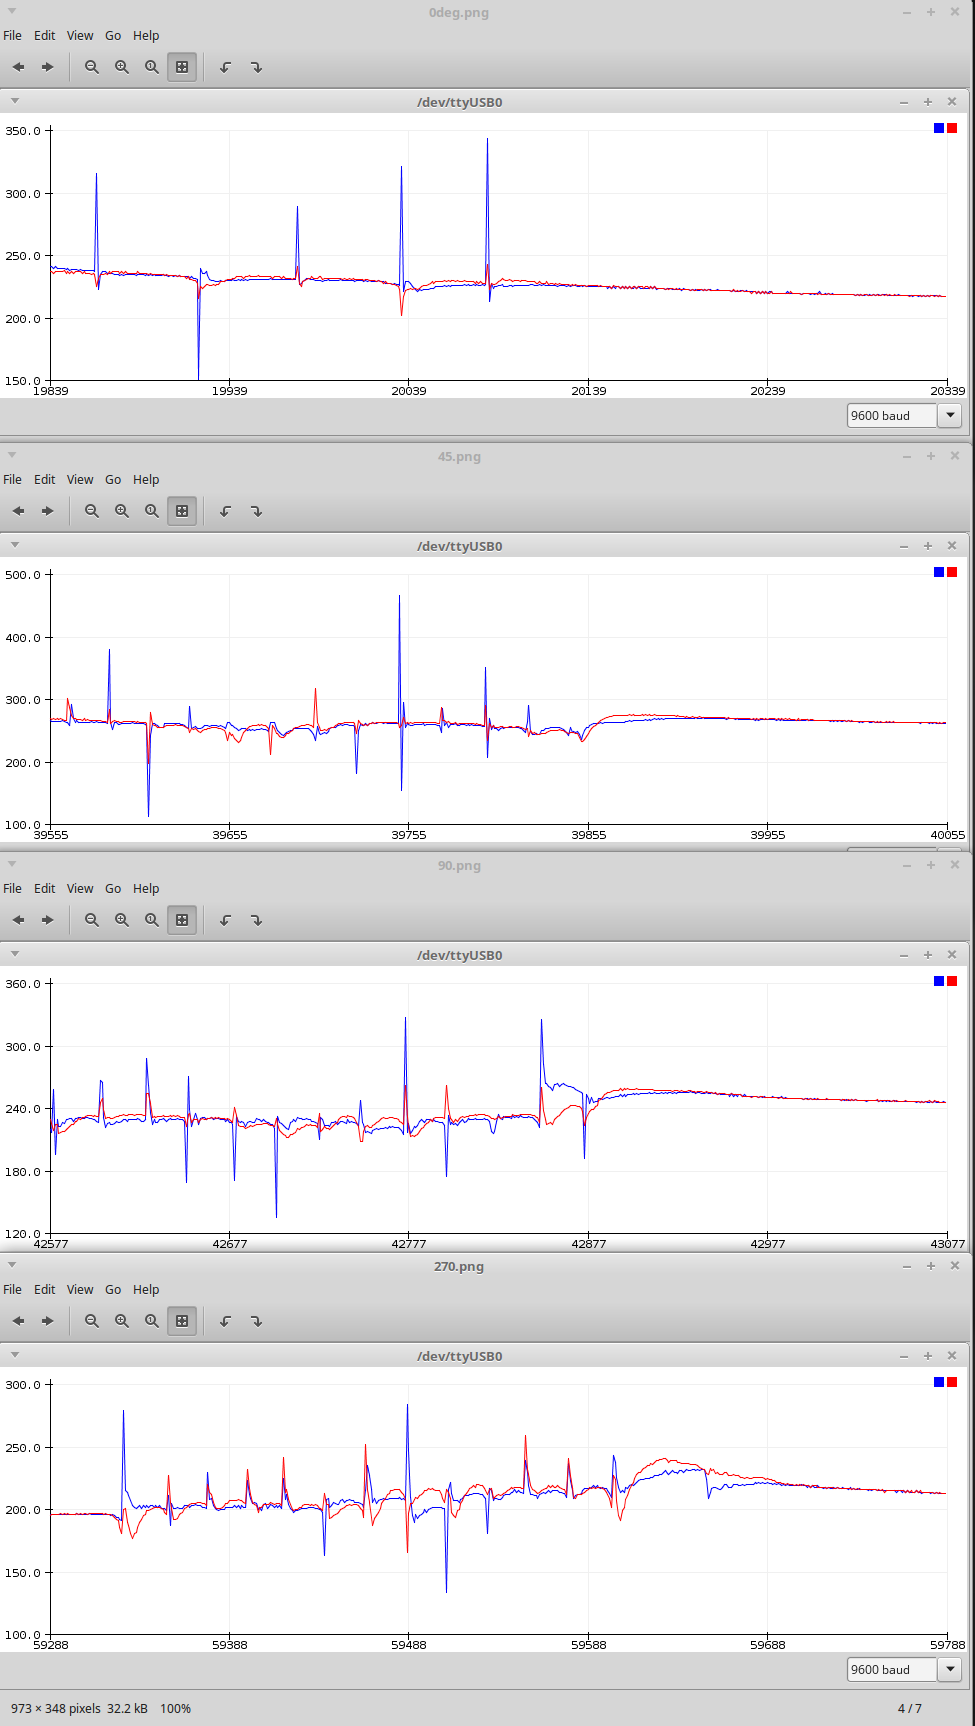

In [11]:
Image(filename='img/signalsFirst.png', width= 500)

## Second Attempt

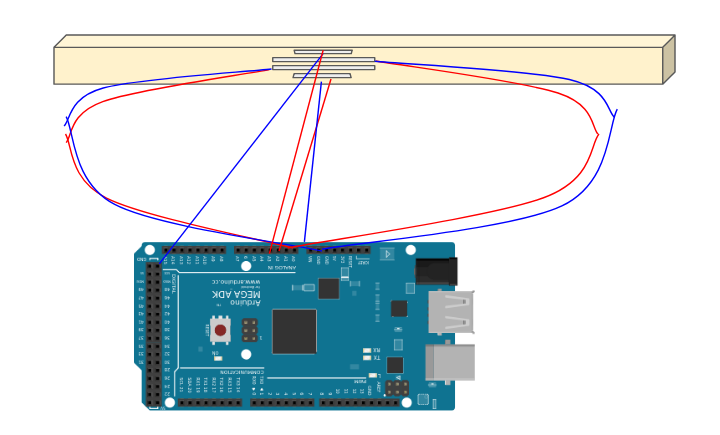

In [12]:
Image(filename='img/SecondAttempt.png', width= 500)

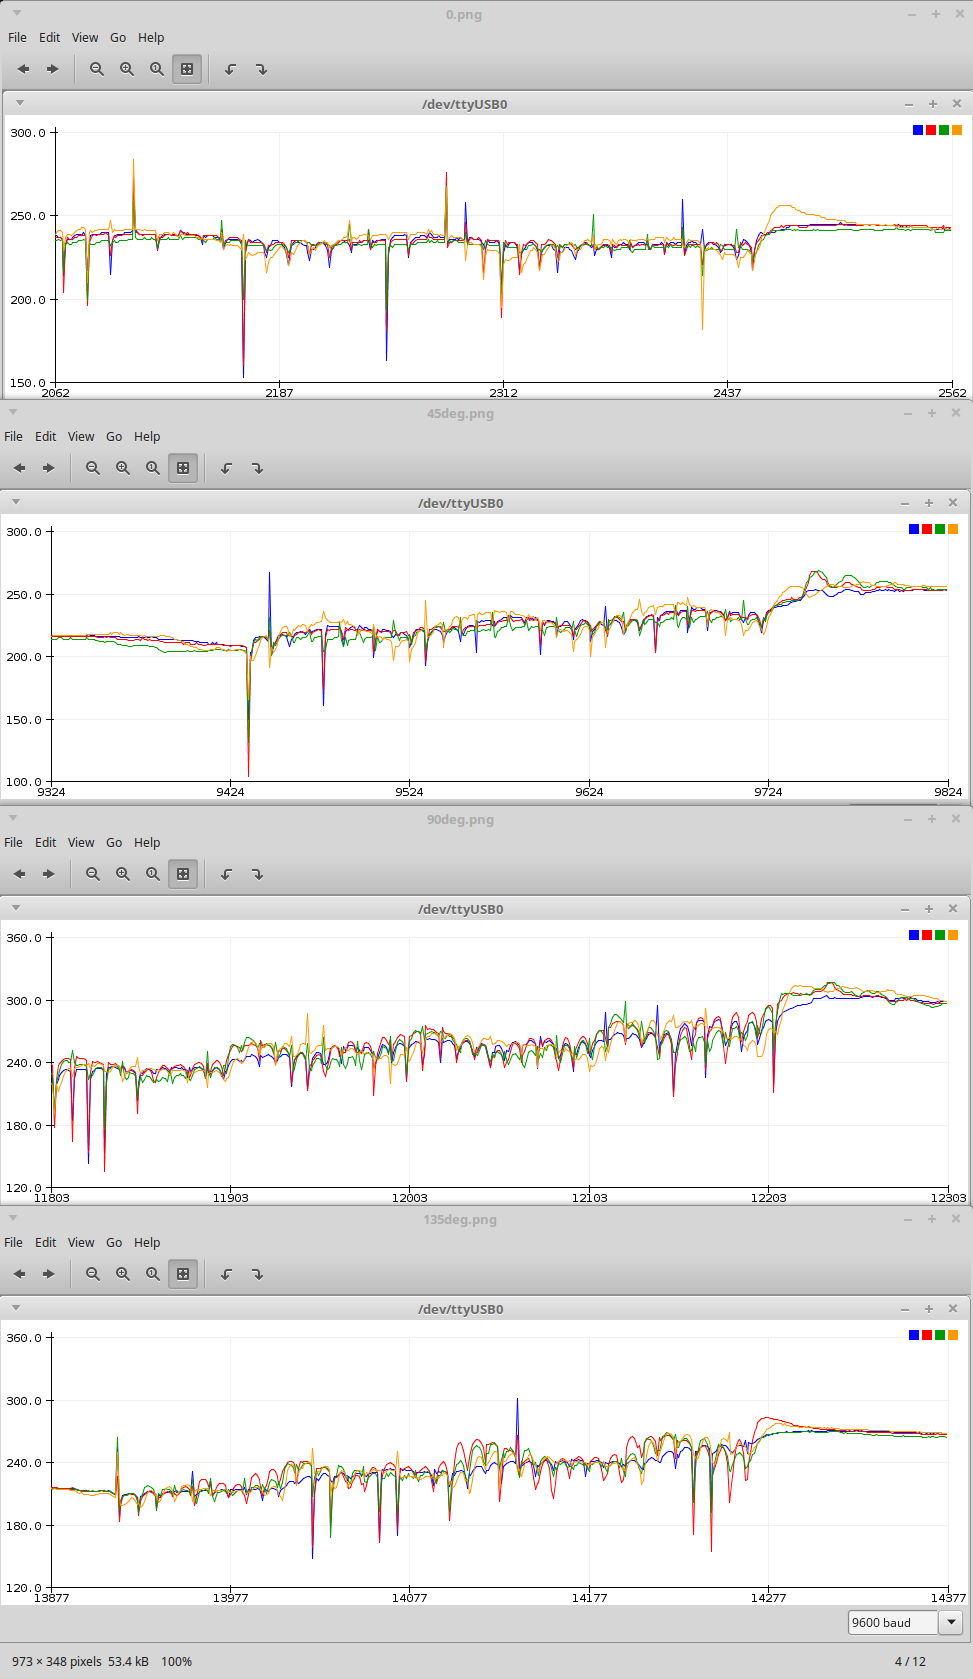

In [13]:
Image(filename='img/0-135.png', width= 900)

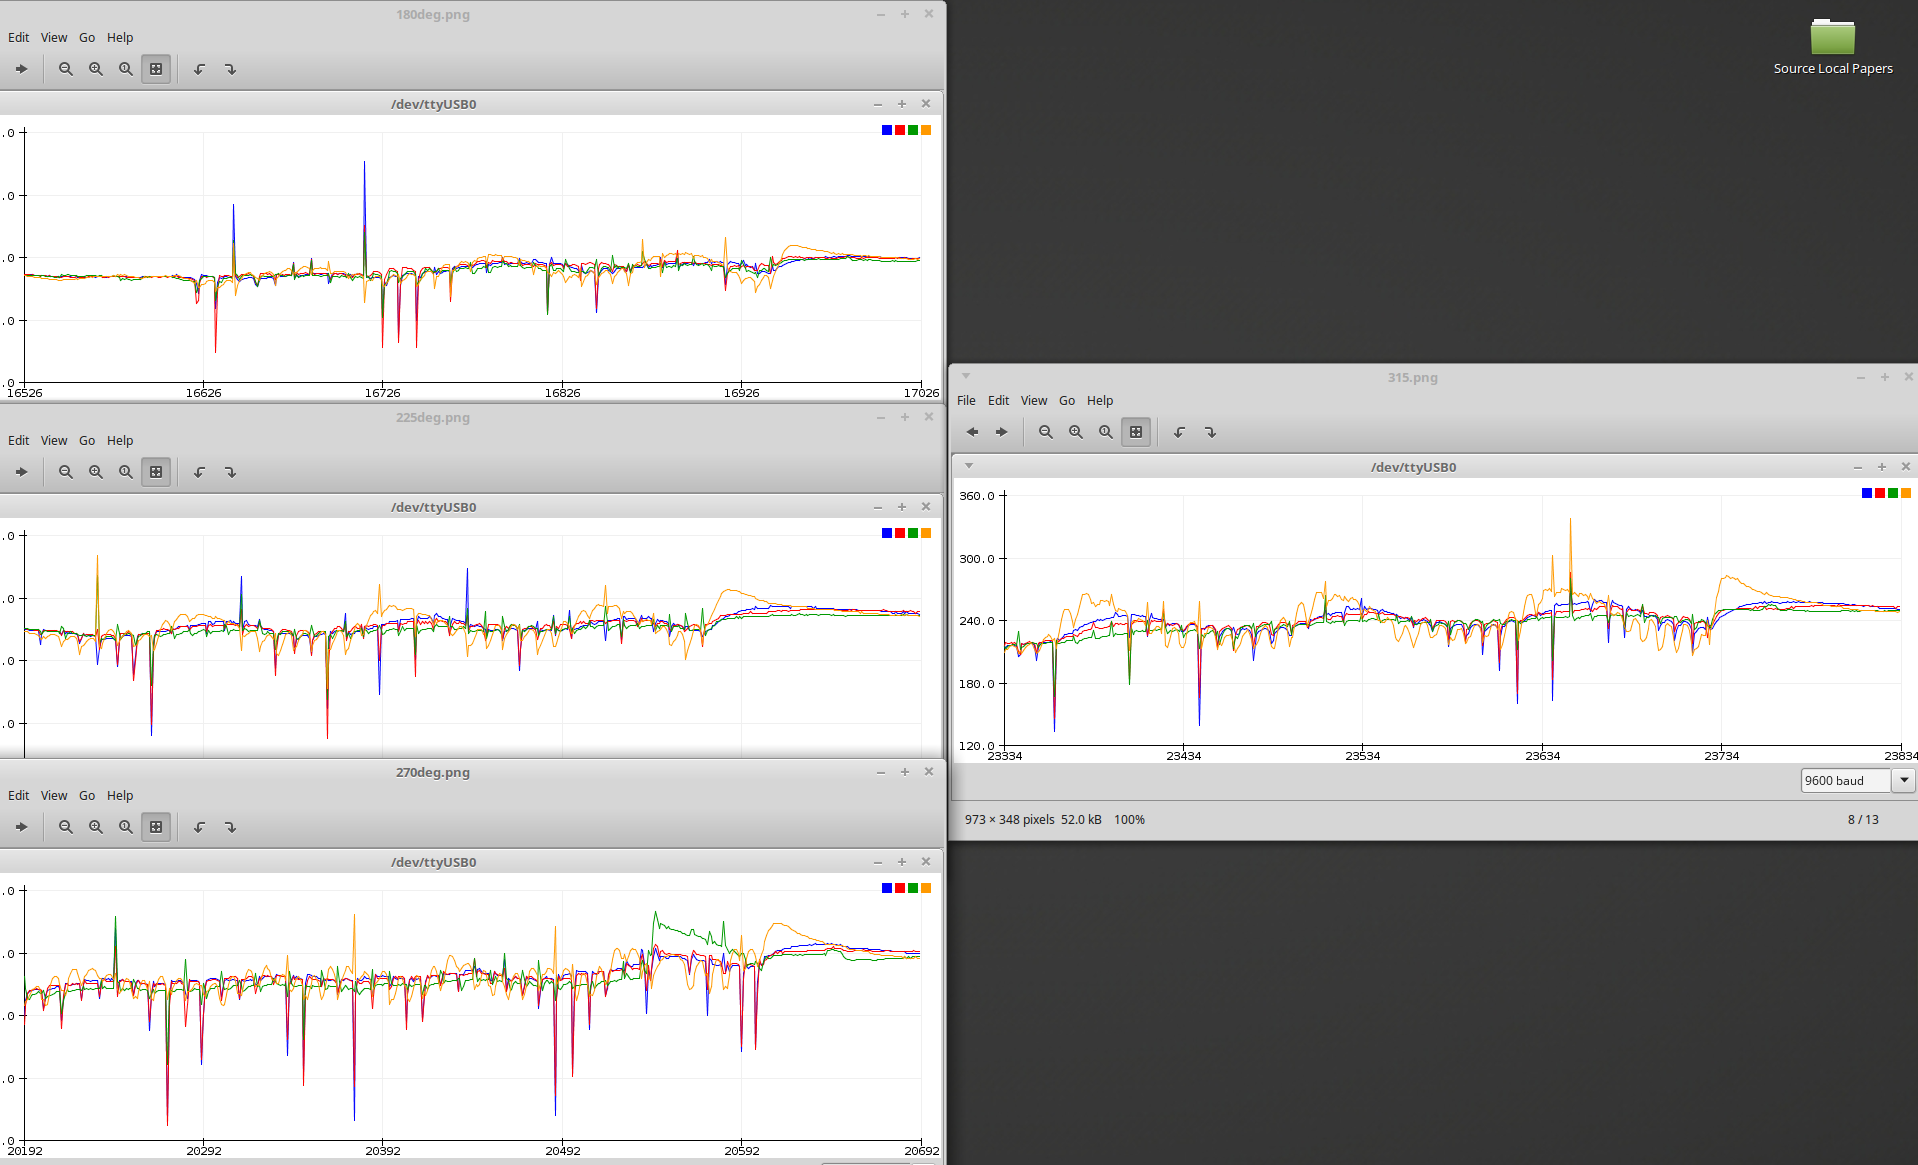

In [14]:
Image(filename='img/180-315.png', width= 1000)

**Question: Are 2 sensors enough to characterize the angle between the point and the impact or do we need 4?**

**How I will answer:** Rolling window (not event based window) + event detection + neural network

#### PLAN: How many sensors?

- Stick two sensors together
- Keep track of order of sensors with respect to the material 
- Gather Data from Arduino MEGA
- Train neural network with rolling window and see if the test MSE is good enough
- If it is not good enough, try 4 and see again
- Conclusions will happen next
- Measure sampling rate from ESP with 2 and 4 sensors

When collecting data from esp, make sure to zero the data around a positive integer. Bias?

### Training First Dataset

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import loadingData1

In [7]:
deg40p1= pd.read_csv('junkCodes/40deg1.txt', sep=" ", header= None)
deg40p1 = deg40p1.replace({r'\\r\\n': '', r'b': '', r"'": '', r'\\x': ''}, regex=True)

deg40p5= pd.read_csv('junkCodes/40deg5.txt', sep=" ", header= None)
deg40p5 = deg40p5.replace({r'\\r\\n': '', r'b': '', r"'": '', r'\\x': '', r'ff': ''}, regex=True)

deg40p10= pd.read_csv('junkCodes/40deg10.txt', sep=" ", header= None)
deg40p10 = deg40p10.replace({r'\\r\\n': '', r'b': '', r"'": '', r'\\x': '', r'ff': ''}, regex=True)

deg40p20= pd.read_csv('junkCodes/40deg20.txt', sep=" ", header= None)
deg40p20 = deg40p20.replace({r'\\r\\n': '', r'b': '', r"'": '', r'\\x': '', r'ff': '', r'fe': ''}, regex=True)

deg90p15= pd.read_csv('junkCodes/90deg15.txt', sep=" ", header= None)
deg90p15 = deg90p15.replace({r'\\r\\n': '', r'b': '', r"'": '', r'\\x': '', r'ff': '', r'fe': ''}, regex=True)

deg220p10= pd.read_csv('junkCodes/220deg10.txt', sep=" ", header= None)
deg220p10 = deg220p10.replace({r'\\r\\n': '', r'b': '', r"'": '', r'\\x': '', r'ff': '', r'fa': ''
                             , r'e': ''}, regex=True)

deg320p25= pd.read_csv('junkCodes/320deg25.txt', sep=" ", header= None)
deg320p25 = deg320p25.replace({r'\\r\\n': '', r'b': '', r"'": '', r'\\x': '', r'ff': '', r'fa': ''
                             , r'e': '', r'f': ''}, regex=True)

deg150p20= pd.read_csv('junkCodes/150deg20.txt', sep=" ", header= None)
deg150p20 = deg150p20.replace({r'\\r\\n': '', r'b': '', r"'": '', r'\\x': '', r'ff': '', r'fa': ''
                             , r'e': '', r'f': ''}, regex=True)


deg40p1= deg40p1.values
deg40p10= deg40p10.values
deg40p5= deg40p5.values
deg40p20= deg40p20.values
deg90p15= deg90p15.values
deg220p10= deg220p10.values
deg320p25= deg320p25.values
deg150p20 = deg150p20.values

deg40point1= []
deg40point10 = []
deg40point5 = []
deg40point20 = []
deg90point15 = []
deg220point10 = []
deg320point25= []
deg150point20= []

for i in range(deg40p1.shape[1]):
        if deg40p1[0][i]!="":
            deg40point1 += [int(deg40p1[0][i])]

for i in range(deg40p10.shape[1]):
        if deg40p10[0][i]!="":
            deg40point10 += [int(deg40p10[0][i])]
            
for i in range(deg40p5.shape[1]):
        if deg40p5[0][i]!="":
            deg40point5 += [int(deg40p5[0][i])]

for i in range(deg40p20.shape[1]):
        if deg40p20[0][i]!="":
            deg40point20 += [int(deg40p20[0][i])]

for i in range(deg90p15.shape[1]):
        if deg90p15[0][i]!="":
            deg90point15 += [int(deg90p15[0][i])]
            
for i in range(deg220p10.shape[1]):
        if deg220p10[0][i]!="":
            deg220point10 += [int(deg220p10[0][i])]
            
for i in range(deg320p25.shape[1]):
        if deg320p25[0][i]!="":
            deg320point25 += [int(deg320p25[0][i])]
            
for i in range(deg150p20.shape[1]):
        if deg150p20[0][i]!="":
            deg150point20 += [int(deg150p20[0][i])]
            
deg40point1= np.reshape(deg40point1, (-1,2))
deg40point10= np.reshape(deg40point10, (-1,2))
deg40point5= np.reshape(deg40point5, (-1,2))
deg40point20= np.reshape(deg40point20, (-1,2))
deg90point15= np.reshape(deg90point15, (-1,2))
deg220point10= np.reshape(deg220point10, (-1,2))
deg320point25= np.reshape(deg320point25, (-1,2))
deg150point20= np.reshape(deg150point20, (-1,2))

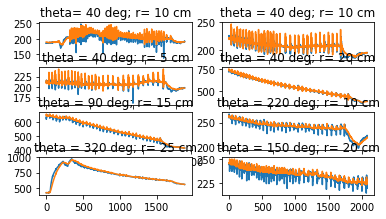

In [8]:
plt.subplot(5,2,1)
plt.plot(deg40point1[1000:-1])
plt.title('theta= 40 deg; r= 10 cm')
plt.subplot(5,2,2)
plt.plot(deg40point10[1000:-1])
plt.title('theta = 40 deg; r= 10 cm')
plt.subplot(5,2,3)
plt.plot(deg40point5[1000:-1])
plt.title('theta = 40 deg; r= 5 cm')
plt.subplot(5,2,4)
plt.plot(deg40point20[1000:-1])
plt.title('theta = 40 deg; r= 20 cm')
plt.subplot(5,2,5)
plt.plot(deg90point15[1000:-1])
plt.title('theta = 90 deg; r= 15 cm')
plt.subplot(5,2,6)
plt.plot(deg220point10[1000:-1])
plt.title('theta = 220 deg; r= 10 cm')
plt.subplot(5,2,7)
plt.plot(deg320point25[1000:-1])
plt.title('theta = 320 deg; r= 25 cm')
plt.subplot(5,2,8)
plt.plot(deg150point20[1000:-200])
plt.title('theta = 150 deg; r= 20 cm')

plt.show()

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


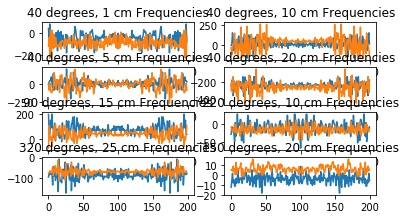

In [138]:
# Performing an nFFT in the whole data

fromPoint= 300
toPoint= 600

FS1 = np.fft.fft(deg40point1[fromPoint:toPoint, 0])
FS2 = np.fft.fft(deg40point1[fromPoint:toPoint, 1])

plt.subplot(5,2,1)
plt.plot(FS1[50:-50])
plt.plot(FS2[50:-50])
plt.title('40 degrees, 1 cm Frequencies')


plt.subplot(5,2,2)
FS1 = np.fft.fft(deg40point10[fromPoint:toPoint, 0])
FS2 = np.fft.fft(deg40point10[fromPoint:toPoint, 1])

plt.plot(FS1[50:-50])
plt.plot(FS2[50:-50])
plt.title('40 degrees, 10 cm Frequencies')


plt.subplot(5,2,3)
FS1 = np.fft.fft(deg40point5[fromPoint:toPoint, 0])
FS2 = np.fft.fft(deg40point5[fromPoint:toPoint, 1])
plt.title('40 degrees, 5 cm Frequencies')
plt.plot(FS1[50:-50])
plt.plot(FS2[50:-50])


plt.subplot(5,2,4)
FS1 = np.fft.fft(deg40point20[fromPoint:toPoint, 0])
FS2 = np.fft.fft(deg40point20[fromPoint:toPoint, 1])
plt.title('40 degrees, 20 cm Frequencies')
plt.plot(FS1[50:-50])
plt.plot(FS2[50:-50])


plt.subplot(5,2,5)
FS1 = np.fft.fft(deg90point15[fromPoint:toPoint, 0])
FS2 = np.fft.fft(deg90point15[fromPoint:toPoint, 1])
plt.title('90 degrees, 15 cm Frequencies')
plt.plot(FS1[50:-50])
plt.plot(FS2[50:-50])


plt.subplot(5,2,6)
FS1 = np.fft.fft(deg220point10[fromPoint:toPoint, 0])
FS2 = np.fft.fft(deg220point10[fromPoint:toPoint, 1])
plt.title('220 degrees, 10 cm Frequencies')
plt.plot(FS1[50:-50])
plt.plot(FS2[50:-50])


plt.subplot(5,2,7)
FS1 = np.fft.fft(deg320point25[fromPoint:toPoint, 0])
FS2 = np.fft.fft(deg320point25[fromPoint:toPoint, 1])
plt.title('320 degrees, 25 cm Frequencies')
plt.plot(FS1[50:-50])
plt.plot(FS2[50:-50])


plt.subplot(5,2,8)
FS1 = np.fft.fft(deg150point20[fromPoint:toPoint, 0])
FS2 = np.fft.fft(deg150point20[fromPoint:toPoint, 1])
plt.title('150 degrees, 20 cm Frequencies')
plt.plot(FS1[50:-50])
plt.plot(FS2[50:-50])
plt.show()


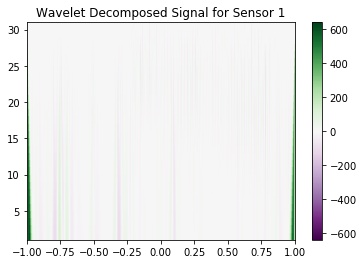

In [46]:
#Nah, Wavelet decomposition in C p595 pdf731 Numerical Recipes in C
from scipy import signal

t= np.linspace(-1, 1, len(deg40point1[:, 0]), endpoint=False)
widths = np.arange(1, 31)

cwtmatr = signal.cwt(deg40point1[:, 0], signal.ricker, widths)
plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
            vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.colorbar()
plt.title('Wavelet Decomposed Signal for Sensor 1')
plt.show()

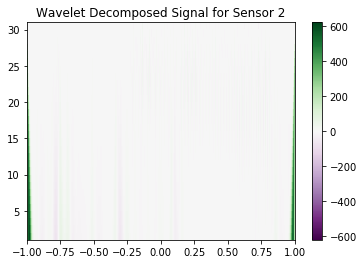

In [47]:
t= np.linspace(-1, 1, len(deg40point1[:, 1]), endpoint=False)
widths = np.arange(1, 31)
cwtmatr = signal.cwt(deg40point1[:, 1], signal.ricker, widths)
plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
            vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.colorbar()
plt.title('Wavelet Decomposed Signal for Sensor 2')
plt.show()

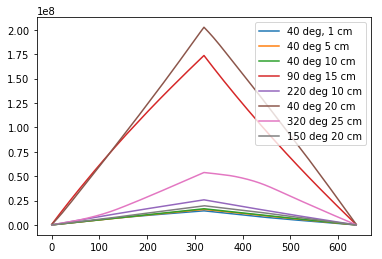

In [135]:
from scipy import signal 

# Get cross correlation between the signals. 
buffer=320

mode= 'full'
plt.figure()
delT1= signal.fftconvolve(deg40point1[500:500+buffer, 0], deg40point1[500:500+buffer, 1], mode)
delT2= signal.fftconvolve(deg40point5[500:500+buffer, 0], deg40point5[500:500+buffer, 1], mode)
delT3= signal.fftconvolve(deg40point10[500:500+buffer, 0], deg40point10[500:500+buffer, 1], mode)
delT4= signal.fftconvolve(deg40point20[500:500+buffer, 0], deg40point20[500:500+buffer, 1], mode)

delTT1= signal.fftconvolve(deg90point15[500:500+buffer, 0], deg90point15[500:500+buffer, 1], mode)
delTT2= signal.fftconvolve(deg220point10[500:500+buffer, 0], deg220point10[500:500+buffer, 1], mode)
delTT3= signal.fftconvolve(deg320point25[500:500+buffer, 0], deg320point25[500:500+buffer, 1], mode)
delTT4= signal.fftconvolve(deg150point20[500:500+buffer, 0], deg150point20[500:500+buffer, 1], mode)

plt.plot(delT1, label= '40 deg, 1 cm')
plt.plot(delT2, label='40 deg 5 cm')
plt.plot(delT3, label='40 deg 10 cm')

plt.plot(delTT1, label='90 deg 15 cm')
plt.plot(delTT2, label='220 deg 10 cm')
plt.plot(delT4, label='40 deg 20 cm')
plt.plot(delTT3, label='320 deg 25 cm')
plt.plot(delTT4, label='150 deg 20 cm')

plt.plot()
plt.legend()